In [59]:
import pandas as pd
import numpy as np
import openpyxl

# Load the Excel files
file_path_2024_2025 = 'all-euro-data-2024-2025.xlsx'
file_path_2023_2024 = 'all-euro-data-2023-2024.xlsx'

# Load the Excel files into pandas DataFrames
data_2024_2025 = pd.read_excel(file_path_2024_2025, sheet_name=None)
data_2023_2024 = pd.read_excel(file_path_2023_2024, sheet_name=None)

# Display the sheet names in each file to understand the structure
sheets_2024_2025 = list(data_2024_2025.keys())
sheets_2023_2024 = list(data_2023_2024.keys())

sheets_2024_2025, sheets_2023_2024


(['E0',
  'E1',
  'E2',
  'E3',
  'EC',
  'SC0',
  'SC1',
  'SC2',
  'SC3',
  'D1',
  'D2',
  'SP1',
  'SP2',
  'I1',
  'I2',
  'F1',
  'F2',
  'B1',
  'N1',
  'P1',
  'T1',
  'G1'],
 ['E0',
  'E1',
  'E2',
  'E3',
  'EC',
  'SC0',
  'SC1',
  'SC2',
  'SC3',
  'D1',
  'D2',
  'SP1',
  'SP2',
  'I1',
  'I2',
  'F1',
  'F2',
  'B1',
  'N1',
  'P1',
  'T1',
  'G1'])

In [60]:
# Define a function to merge all sheets from both seasons
def load_and_merge_seasons(data_2024_2025, data_2023_2024):
    merged_data = []
    
    for sheet_name in sheets_2024_2025:
        # Load data for 2024-2025 and add season and league columns
        df_2024_2025 = data_2024_2025[sheet_name].copy()
        df_2024_2025['Season'] = '2024-2025'
        df_2024_2025['League'] = sheet_name

        # Load data for 2023-2024 and add season and league columns
        df_2023_2024 = data_2023_2024[sheet_name].copy()
        df_2023_2024['Season'] = '2023-2024'
        df_2023_2024['League'] = sheet_name
        
        # Append both dataframes to the list
        merged_data.append(pd.concat([df_2024_2025, df_2023_2024], ignore_index=True))
    
    # Combine all sheets into one DataFrame
    combined_df = pd.concat(merged_data, ignore_index=True)
    return combined_df

# Combine both seasons
merged_df = load_and_merge_seasons(data_2024_2025, data_2023_2024)

# Display basic info and first few rows of the merged dataframe
merged_df_info = merged_df.info()
merged_df_sample = merged_df.head()

merged_df_info, merged_df_sample


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8605 entries, 0 to 8604
Columns: 134 entries, Div to VCCA
dtypes: datetime64[ns](1), float64(119), int64(2), object(12)
memory usage: 8.8+ MB


(None,
   Div       Date      Time    HomeTeam     AwayTeam  FTHG  FTAG FTR     HTHG  \
 0  E0 2024-08-16  20:00:00  Man United       Fulham     1     0   H 0.000000   
 1  E0 2024-08-17  12:30:00     Ipswich    Liverpool     0     2   A 0.000000   
 2  E0 2024-08-17  15:00:00     Arsenal       Wolves     2     0   H 1.000000   
 3  E0 2024-08-17  15:00:00     Everton     Brighton     0     3   A 0.000000   
 4  E0 2024-08-17  15:00:00   Newcastle  Southampton     1     0   H 1.000000   
 
       HTAG  ... IWA VCH  VCD  VCA  IWCH  IWCD  IWCA  VCCH  VCCD  VCCA  
 0 0.000000  ... NaN NaN  NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN  
 1 0.000000  ... NaN NaN  NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN  
 2 0.000000  ... NaN NaN  NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN  
 3 1.000000  ... NaN NaN  NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN  
 4 0.000000  ... NaN NaN  NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN  
 
 [5 rows x 134 columns])

In [61]:
# Quick exploration of the dataset by checking for missing values and basic statistics
missing_values = merged_df.isnull().sum()
basic_stats = merged_df.describe()

# Check unique values in relevant categorical columns like 'HomeTeam', 'AwayTeam', 'League', and 'Season'
unique_leagues = merged_df['League'].unique()
unique_seasons = merged_df['Season'].unique()
unique_home_teams = merged_df['HomeTeam'].unique()
unique_away_teams = merged_df['AwayTeam'].unique()

# Display results
missing_values, basic_stats, unique_leagues, unique_seasons, len(unique_home_teams), len(unique_away_teams)


(Div            0
 Date           0
 Time           0
 HomeTeam       0
 AwayTeam       0
             ... 
 IWCD        4651
 IWCA        4651
 VCCH         809
 VCCD         809
 VCCA         809
 Length: 134, dtype: int64,
                                 Date        FTHG        FTAG        HTHG  \
 count                           8605 8605.000000 8605.000000 8602.000000   
 mean   2024-01-21 15:50:41.069145856    1.527484    1.244277    0.672053   
 min              2023-07-28 00:00:00    0.000000    0.000000    0.000000   
 25%              2023-10-28 00:00:00    1.000000    0.000000    0.000000   
 50%              2024-01-21 00:00:00    1.000000    1.000000    0.000000   
 75%              2024-04-03 00:00:00    2.000000    2.000000    1.000000   
 max              2024-09-10 00:00:00    9.000000    8.000000    6.000000   
 std                              NaN    1.288144    1.157040    0.817909   
 
              HTAG          HS          AS         HST         AST          HF 

In [62]:
# Dropping all betting-related columns
betting_columns = [col for col in merged_df.columns if 'VC' in col or 'VCH' in col or 'IW' in col or 'B365' in col]
merged_df_cleaned = merged_df.drop(columns=betting_columns)

# Checking the columns that remain after removing the betting columns
remaining_columns = merged_df_cleaned.columns

# Displaying the first few rows of the cleaned data
merged_df_cleaned_sample = merged_df_cleaned.head()

remaining_columns, merged_df_cleaned_sample


(Index(['Div', 'Date', 'Time', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR',
        'HTHG', 'HTAG',
        ...
        'PCAHH', 'PCAHA', 'MaxCAHH', 'MaxCAHA', 'AvgCAHH', 'AvgCAHA', 'BFECAHH',
        'BFECAHA', 'Season', 'League'],
       dtype='object', length=108),
   Div       Date      Time    HomeTeam     AwayTeam  FTHG  FTAG FTR     HTHG  \
 0  E0 2024-08-16  20:00:00  Man United       Fulham     1     0   H 0.000000   
 1  E0 2024-08-17  12:30:00     Ipswich    Liverpool     0     2   A 0.000000   
 2  E0 2024-08-17  15:00:00     Arsenal       Wolves     2     0   H 1.000000   
 3  E0 2024-08-17  15:00:00     Everton     Brighton     0     3   A 0.000000   
 4  E0 2024-08-17  15:00:00   Newcastle  Southampton     1     0   H 1.000000   
 
       HTAG  ...    PCAHH    PCAHA  MaxCAHH  MaxCAHA  AvgCAHH  AvgCAHA  \
 0 0.000000  ... 1.830000 2.110000 1.880000 2.110000 1.820000 2.050000   
 1 0.000000  ... 2.040000 1.900000 2.200000 2.000000 1.990000 1.880000   
 2 0.000000  ... 2.

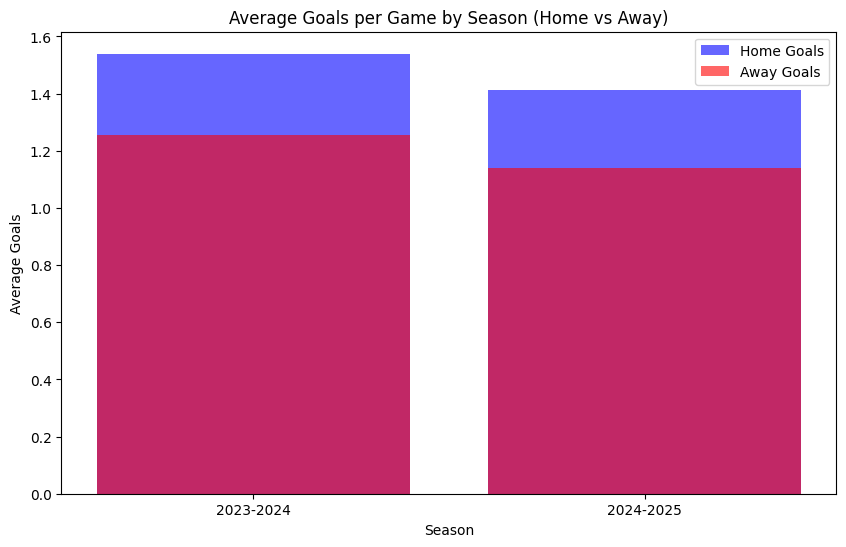

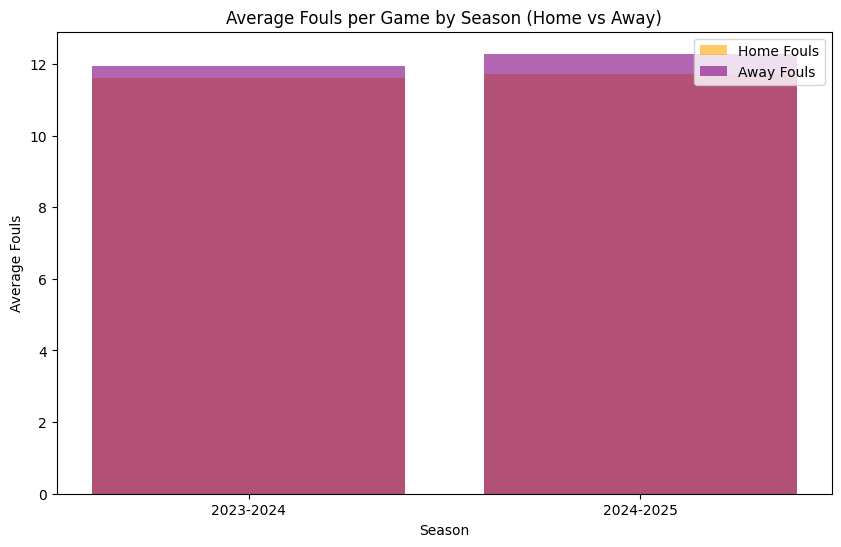

In [63]:
# visualisations
import matplotlib.pyplot as plt
def visualize_match_statistics(df):
    plt.figure(figsize=(10, 6))
    home_goals_avg = df.groupby('Season')['FTHG'].mean()
    away_goals_avg = df.groupby('Season')['FTAG'].mean()
    
    # Bar chart for average home and away goals
    plt.bar(home_goals_avg.index, home_goals_avg, label='Home Goals', color='blue', alpha=0.6)
    plt.bar(away_goals_avg.index, away_goals_avg, label='Away Goals', color='red', alpha=0.6)
    plt.title('Average Goals per Game by Season (Home vs Away)')
    plt.ylabel('Average Goals')
    plt.xlabel('Season')
    plt.legend()
    plt.show()

    

    # Bar chart for fouls comparison between home and away teams
    plt.figure(figsize=(10, 6))
    home_fouls_avg = df.groupby('Season')['HF'].mean()
    away_fouls_avg = df.groupby('Season')['AF'].mean()
    
    plt.bar(home_fouls_avg.index, home_fouls_avg, label='Home Fouls', color='orange', alpha=0.6)
    plt.bar(away_fouls_avg.index, away_fouls_avg, label='Away Fouls', color='purple', alpha=0.6)
    plt.title('Average Fouls per Game by Season (Home vs Away)')
    plt.ylabel('Average Fouls')
    plt.xlabel('Season')
    plt.legend()
    plt.show()

# Call the function with the cleaned dataframe
visualize_match_statistics(merged_df_cleaned)

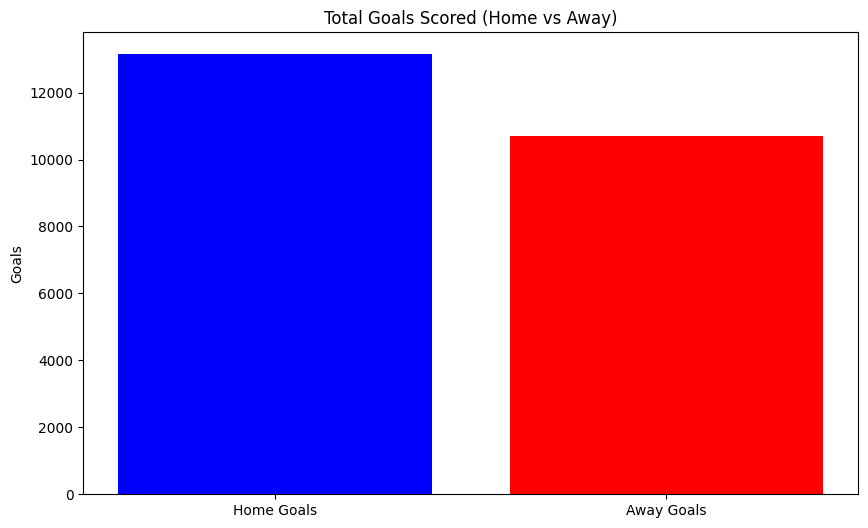

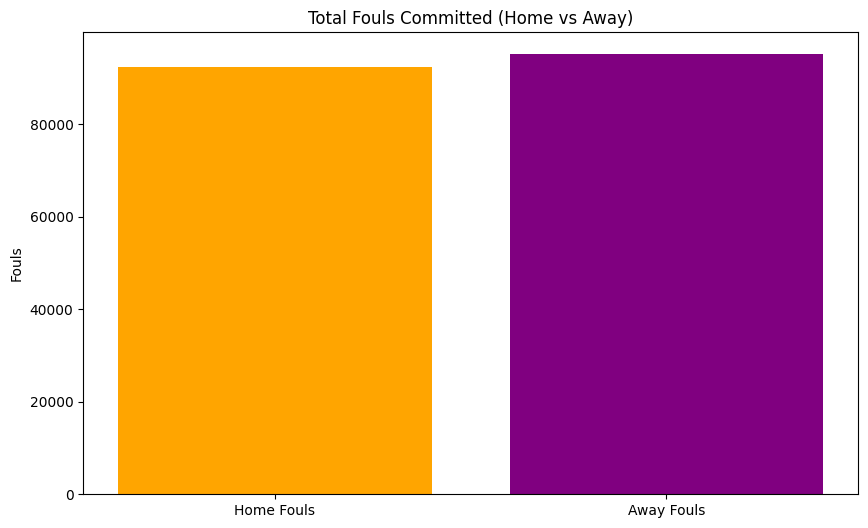

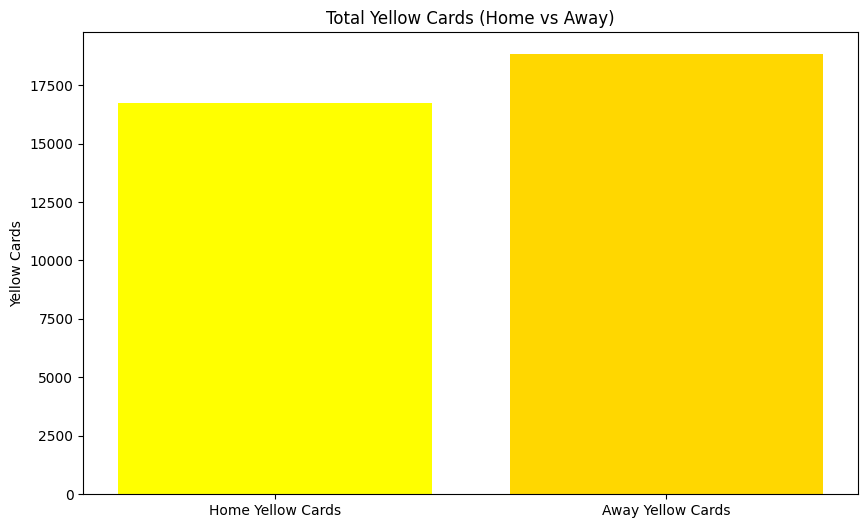

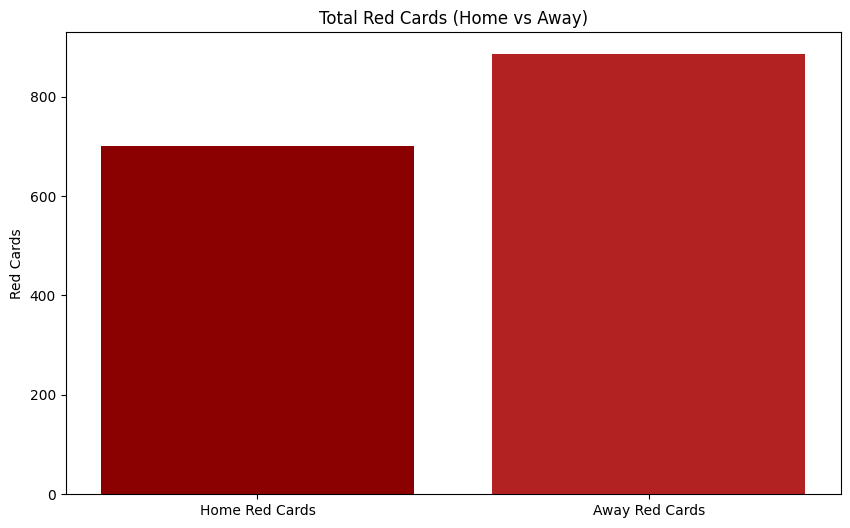

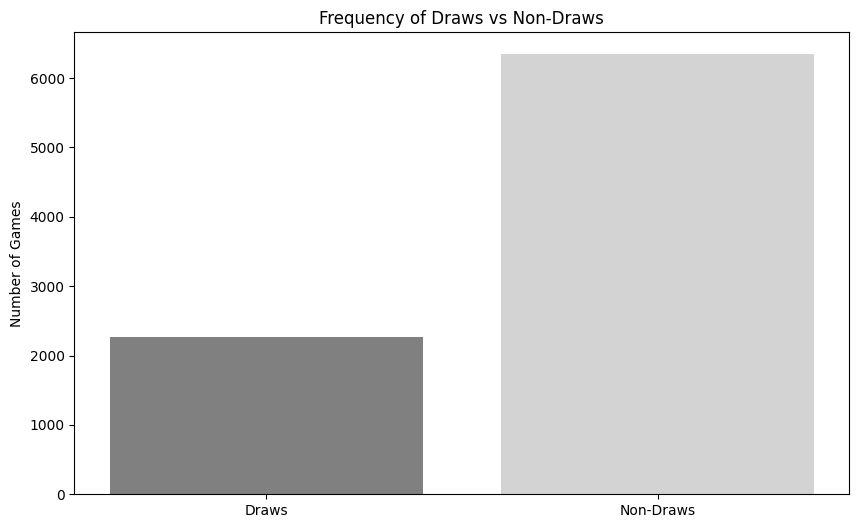

In [64]:
# Define a function to visualize key match statistics like goals, fouls, cards, and draws

def visualize_match_stats(df):
    # 1. Goals Scored in a Game (Home and Away)
    plt.figure(figsize=(10, 6))
    home_goals_total = df['FTHG'].sum()
    away_goals_total = df['FTAG'].sum()

    plt.bar(['Home Goals', 'Away Goals'], [home_goals_total, away_goals_total], color=['blue', 'red'])
    plt.title('Total Goals Scored (Home vs Away)')
    plt.ylabel('Goals')
    plt.show()

    # 2. Total Fouls Comparison (Home vs Away)
    plt.figure(figsize=(10, 6))
    home_fouls_total = df['HF'].sum()
    away_fouls_total = df['AF'].sum()

    plt.bar(['Home Fouls', 'Away Fouls'], [home_fouls_total, away_fouls_total], color=['orange', 'purple'])
    plt.title('Total Fouls Committed (Home vs Away)')
    plt.ylabel('Fouls')
    plt.show()

    # 3. Yellow Cards (Home vs Away)
    plt.figure(figsize=(10, 6))
    home_yellow_cards_total = df['HY'].sum()
    away_yellow_cards_total = df['AY'].sum()

    plt.bar(['Home Yellow Cards', 'Away Yellow Cards'], [home_yellow_cards_total, away_yellow_cards_total], color=['yellow', 'gold'])
    plt.title('Total Yellow Cards (Home vs Away)')
    plt.ylabel('Yellow Cards')
    plt.show()

    # 4. Red Cards (Home vs Away)
    plt.figure(figsize=(10, 6))
    home_red_cards_total = df['HR'].sum()
    away_red_cards_total = df['AR'].sum()

    plt.bar(['Home Red Cards', 'Away Red Cards'], [home_red_cards_total, away_red_cards_total], color=['darkred', 'firebrick'])
    plt.title('Total Red Cards (Home vs Away)')
    plt.ylabel('Red Cards')
    plt.show()

    # 5. Frequency of Draws
    plt.figure(figsize=(10, 6))
    draw_count = df[df['FTR'] == 'D'].shape[0]
    non_draw_count = df.shape[0] - draw_count

    plt.bar(['Draws', 'Non-Draws'], [draw_count, non_draw_count], color=['gray', 'lightgray'])
    plt.title('Frequency of Draws vs Non-Draws')
    plt.ylabel('Number of Games')
    plt.show()

# Call the function to generate the visualizations
visualize_match_stats(merged_df_cleaned)


In [65]:
import plotly.express as px

def interactive_visualizations_with_fouls(df):
    # Frequency of Draws in Each League per Season
    draw_counts = df[df['FTR'] == 'D'].groupby(['League', 'Season']).size().reset_index(name='Draws')

    fig1 = px.bar(draw_counts, x='League', y='Draws', color='Season', barmode='group', title='Frequency of Draws in Each League per Season')
    fig1.update_layout(xaxis_title='League', yaxis_title='Number of Draws')
    fig1.show()

    # Frequency of Over 1.5 Goals in Each League per Season
    df['TotalGoals'] = df['FTHG'] + df['FTAG']
    over_1_5_count = df[df['TotalGoals'] > 1.5].groupby(['League', 'Season']).size().reset_index(name='Over_1.5_Games')

    fig2 = px.bar(over_1_5_count, x='League', y='Over_1.5_Games', color='Season', barmode='group', title='Frequency of Games with Over 1.5 Goals per League and Season')
    fig2.update_layout(xaxis_title='League', yaxis_title='Number of Games (Over 1.5 Goals)')
    fig2.show()

    # Frequency of Over 2.5 Goals in Each League per Season
    over_2_5_count = df[df['TotalGoals'] > 2.5].groupby(['League', 'Season']).size().reset_index(name='Over_2.5_Games')

    fig3 = px.bar(over_2_5_count, x='League', y='Over_2.5_Games', color='Season', barmode='group', title='Frequency of Games with Over 2.5 Goals per League and Season')
    fig3.update_layout(xaxis_title='League', yaxis_title='Number of Games (Over 2.5 Goals)')
    fig3.show()

    # Frequency of Fouls in Each League per Season
    df['TotalFouls'] = df['HF'] + df['AF']
    fouls_count = df.groupby(['League', 'Season'])['TotalFouls'].sum().reset_index()

    fig4 = px.bar(fouls_count, x='League', y='TotalFouls', color='Season', barmode='group', title='Total Fouls in Each League per Season')
    fig4.update_layout(xaxis_title='League', yaxis_title='Total Fouls')
    fig4.show()

# Call the function to generate the visualizations
interactive_visualizations_with_fouls(merged_df_cleaned)


In [66]:
import plotly.express as px

# Filter the data for the top 5 leagues
top_5_leagues = ['E0', 'SP1', 'I1', 'D1', 'F2']  # Premier League, La Liga, Serie A, Bundesliga, Ligue 1
top_5_df = merged_df_cleaned[merged_df_cleaned['League'].isin(top_5_leagues)]

# Define a function to create separate charts for each league
def separate_league_visualizations(df):
    leagues = df['League'].unique()
    for league in leagues:
        league_df = df[df['League'] == league]
        
        # Over 1.5 goals for the league
        over_1_5_teams = league_df[league_df['TotalGoals'] > 1.5].groupby('HomeTeam').size().reset_index(name='Over_1.5_Games')
        fig1 = px.bar(over_1_5_teams, x='HomeTeam', y='Over_1.5_Games', title=f'Over 1.5 Goals by Team in {league}')
        fig1.update_layout(xaxis_title='Team', yaxis_title='Games Over 1.5 Goals', xaxis_tickangle=-45)
        fig1.show()

        # Over 2.5 goals for the league
        over_2_5_teams = league_df[league_df['TotalGoals'] > 2.5].groupby('HomeTeam').size().reset_index(name='Over_2.5_Games')
        fig2 = px.bar(over_2_5_teams, x='HomeTeam', y='Over_2.5_Games', title=f'Over 2.5 Goals by Team in {league}')
        fig2.update_layout(xaxis_title='Team', yaxis_title='Games Over 2.5 Goals', xaxis_tickangle=-45)
        fig2.show()

        # Draws by team in the league
        draws_teams = league_df[league_df['FTR'] == 'D'].groupby('HomeTeam').size().reset_index(name='Draws')
        fig3 = px.bar(draws_teams, x='HomeTeam', y='Draws', title=f'Draws by Team in {league}')
        fig3.update_layout(xaxis_title='Team', yaxis_title='Number of Draws', xaxis_tickangle=-45)
        fig3.show()

        # Fouls committed by team in the league
        league_df['TotalFouls'] = league_df['HF'] + league_df['AF']
        fouls_teams = league_df.groupby('HomeTeam')['TotalFouls'].sum().reset_index()
        fig4 = px.bar(fouls_teams, x='HomeTeam', y='TotalFouls', title=f'Total Fouls by Team in {league}')
        fig4.update_layout(xaxis_title='Team', yaxis_title='Total Fouls', xaxis_tickangle=-45)
        fig4.show()

# Call the function for the separated visualizations
separate_league_visualizations(top_5_df)


C:\Users\dagbo_b40tnyc\AppData\Local\Temp\ipykernel_20740\3217407736.py:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



C:\Users\dagbo_b40tnyc\AppData\Local\Temp\ipykernel_20740\3217407736.py:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



C:\Users\dagbo_b40tnyc\AppData\Local\Temp\ipykernel_20740\3217407736.py:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



C:\Users\dagbo_b40tnyc\AppData\Local\Temp\ipykernel_20740\3217407736.py:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



C:\Users\dagbo_b40tnyc\AppData\Local\Temp\ipykernel_20740\3217407736.py:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [67]:


def clean_data_fixed(df):
    # Dropping unnecessary columns
    columns_to_drop = ['Div', 'Time', 'Referee']
    df_cleaned = df.drop(columns=columns_to_drop, errors='ignore')
    
    # Fill missing values only for numeric columns
    numeric_cols = df_cleaned.select_dtypes(include=['number']).columns
    df_cleaned[numeric_cols] = df_cleaned[numeric_cols].fillna(df_cleaned[numeric_cols].median())
    
    return df_cleaned

# Reapply the clean_data_fixed function
merged_df_cleaned = clean_data_fixed(merged_df_cleaned)

# Display the first few rows to confirm missing values have been handled
merged_df_cleaned.head()


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,...,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,BFECAHH,BFECAHA,Season,League,TotalGoals,TotalFouls
0,2024-08-16,Man United,Fulham,1,0,H,0.000000,0.000000,D,14.000000,...,1.880000,2.110000,1.820000,2.050000,1.900000,2.080000,2024-2025,E0,1,22.000000
1,2024-08-17,Ipswich,Liverpool,0,2,A,0.000000,0.000000,D,7.000000,...,2.200000,2.000000,1.990000,1.880000,2.040000,1.930000,2024-2025,E0,2,27.000000
2,2024-08-17,Arsenal,Wolves,2,0,H,1.000000,0.000000,H,18.000000,...,2.050000,1.930000,1.990000,1.870000,2.020000,1.960000,2024-2025,E0,2,31.000000
3,2024-08-17,Everton,Brighton,0,3,A,0.000000,1.000000,A,9.000000,...,1.920000,2.100000,1.830000,2.040000,1.880000,2.110000,2024-2025,E0,3,16.000000
4,2024-08-17,Newcastle,Southampton,1,0,H,1.000000,0.000000,H,3.000000,...,1.890000,2.100000,1.820000,2.050000,1.890000,2.100000,2024-2025,E0,1,31.000000


In [68]:
# Dropping all betting-related columns based on the provided list

betting_columns = [
    'BFH', 'BFD', 'BFA', 'BSH', 'BSD', 'BSA', 'BWH', 'BWD', 'BWA', 'GBH', 'GBD', 'GBA', 
    'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'PSH', 'PH', 'PSD', 'PD', 'PSA', 'PA', 
    'SOH', 'SOD', 'SOA', 'SBH', 'SBD', 'SBA', 'SJH', 'SJD', 'SJA', 'SYH', 'SYD', 'SYA', 
    'VCH', 'VCD', 'VCA', 'WHH', 'WHD', 'WHA', 'Bb1X2', 'BbMxH', 'BbAvH', 'BbMxD', 'BbAvD', 
    'BbMxA', 'BbAvA', 'MaxH', 'MaxD', 'MaxA', 'AvgH', 'AvgD', 'AvgA', 'BFEH', 'BFED', 'BFEA', 
    'BbOU', 'BbMx>2.5', 'BbAv>2.5', 'BbMx<2.5', 'BbAv<2.5', 'GB>2.5', 'GB<2.5', 'B365>2.5', 
    'B365<2.5', 'P>2.5', 'P<2.5', 'Max>2.5', 'Max<2.5', 'Avg>2.5', 'Avg<2.5', 'BbAH', 'BbAHh', 
    'AHh', 'BbMxAHH', 'BbAvAHH', 'BbMxAHA', 'BbAvAHA', 'GBAHH', 'GBAHA', 'GBAH', 'LBAHH', 
    'LBAHA', 'LBAH', 'B365AHH', 'B365AHA', 'B365AH', 'PAHH', 'PAHA', 'MaxAHH', 'MaxAHA', 
    'AvgAHH', 'AvgAHA','1XBH', '1XBD', '1XBA', 'BFE>2.5', 'BFE<2.5', 'BFEAHH', 'BFEAHA',
       'BWCH', 'BWCD', 'BWCA', 'BFCH', 'BFCD', 'BFCA', 'PSCH', 'PSCD', 'PSCA',
       'WHCH', 'WHCD', 'WHCA', '1XBCH', '1XBCD', '1XBCA', 'MaxCH', 'MaxCD',
       'MaxCA', 'AvgCH', 'AvgCD', 'AvgCA', 'BFECH', 'BFECD', 'BFECA', 'PC>2.5',
       'PC<2.5', 'MaxC>2.5', 'MaxC<2.5', 'AvgC>2.5', 'AvgC<2.5', 'BFEC>2.5',
       'BFEC<2.5', 'AHCh', 'PCAHH', 'PCAHA', 'MaxCAHH', 'MaxCAHA', 'AvgCAHH',
       'AvgCAHA', 'BFECAHH', 'BFECAHA'
]

# Drop betting-related columns from the dataframe
merged_df_cleaned = merged_df_cleaned.drop(columns=betting_columns, errors='ignore')

# Verify if betting columns have been successfully removed
remaining_columns = merged_df_cleaned.columns

remaining_columns


Index(['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG',
       'HTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY',
       'HR', 'AR', 'Season', 'League', 'TotalGoals', 'TotalFouls'],
      dtype='object')

In [69]:
def encode_teams(df):
    # Encode categorical variables (HomeTeam and AwayTeam)
    df['HomeTeam_encoded'] = df['HomeTeam'].astype('category').cat.codes
    df['AwayTeam_encoded'] = df['AwayTeam'].astype('category').cat.codes
    return df

# Reapply encoding first
merged_df_encoded = encode_teams(merged_df_cleaned)

def advanced_feature_engineering_fixed(df):
    # 1. Team Form: Recent performance over the last 5 games
    df['HomeTeamForm'] = df.groupby('HomeTeam_encoded')['FTR'].transform(lambda x: x.eq('H').rolling(5, min_periods=1).mean())
    df['AwayTeamForm'] = df.groupby('AwayTeam_encoded')['FTR'].transform(lambda x: x.eq('A').rolling(5, min_periods=1).mean())
    
    # 2. Goal Scoring and Defensive Abilities: Moving averages of goals scored and conceded
    window_sizes = [3, 5]
    for window in window_sizes:
        df[f'HomeGoalsScoredAvg_{window}'] = df.groupby('HomeTeam_encoded')['FTHG'].transform(lambda x: x.rolling(window, min_periods=1).mean())
        df[f'AwayGoalsScoredAvg_{window}'] = df.groupby('AwayTeam_encoded')['FTAG'].transform(lambda x: x.rolling(window, min_periods=1).mean())
        df[f'HomeGoalsConcededAvg_{window}'] = df.groupby('HomeTeam_encoded')['FTAG'].transform(lambda x: x.rolling(window, min_periods=1).mean())
        df[f'AwayGoalsConcededAvg_{window}'] = df.groupby('AwayTeam_encoded')['FTHG'].transform(lambda x: x.rolling(window, min_periods=1).mean())
    
    # 3. Shot Accuracy: Moving average of shot accuracy
    df['HomeShotAccuracy'] = df['HST'] / df['HS']
    df['AwayShotAccuracy'] = df['AST'] / df['AS']
    df['HomeShotAccuracyRolling'] = df.groupby('HomeTeam_encoded')['HomeShotAccuracy'].transform(lambda x: x.rolling(5, min_periods=1).mean())
    df['AwayShotAccuracyRolling'] = df.groupby('AwayTeam_encoded')['AwayShotAccuracy'].transform(lambda x: x.rolling(5, min_periods=1).mean())
    
    # 4. Foul Tendency: Moving average of fouls committed
    df['HomeFoulsAvg'] = df.groupby('HomeTeam_encoded')['HF'].transform(lambda x: x.rolling(5, min_periods=1).mean())
    df['AwayFoulsAvg'] = df.groupby('AwayTeam_encoded')['AF'].transform(lambda x: x.rolling(5, min_periods=1).mean())
    
    # 5. Team Points (3 points for a win, 1 for a draw, 0 for a loss)
    df['HomePoints'] = df['FTR'].apply(lambda x: 3 if x == 'H' else (1 if x == 'D' else 0))
    df['AwayPoints'] = df['FTR'].apply(lambda x: 3 if x == 'A' else (1 if x == 'D' else 0))
    
    # 6. Head-to-Head Performance: Historical dominance of the home team over the away team
    df['HomeHeadToHeadWins'] = df.groupby(['HomeTeam_encoded', 'AwayTeam_encoded'])['FTR'].transform(lambda x: x.eq('H').rolling(10, min_periods=1).sum()).reset_index(drop=True)
    
    # 7. Calculate cumulative points (League standings)
    df['HomeCumulativePoints'] = df.groupby('HomeTeam_encoded')['HomePoints'].cumsum().reset_index(drop=True)
    df['AwayCumulativePoints'] = df.groupby('AwayTeam_encoded')['AwayPoints'].cumsum().reset_index(drop=True)
    
    # 8. League Position: Simplified version based on cumulative points
    df['HomeLeaguePosition'] = df.groupby('HomeTeam_encoded')['HomeCumulativePoints'].rank(method='first', ascending=False)
    df['AwayLeaguePosition'] = df.groupby('AwayTeam_encoded')['AwayCumulativePoints'].rank(method='first', ascending=False)
    
    # 9. Rest Period: Days since last match for each team
    df['Date'] = pd.to_datetime(df['Date'])
    df['HomeRestDays'] = df.groupby('HomeTeam_encoded')['Date'].diff().dt.days
    df['AwayRestDays'] = df.groupby('AwayTeam_encoded')['Date'].diff().dt.days
    
    # 10. Goal Difference: For both home and away teams
    df['HomeGoalDifference'] = df['FTHG'] - df['FTAG']
    df['AwayGoalDifference'] = df['FTAG'] - df['FTHG']
    
    # 11. Win Streak: Current winning streak for each team
    def win_streak(ftr_col, home=True):
        streak = 0
        for result in ftr_col[::-1]:
            if (home and result == 'H') or (not home and result == 'A'):
                streak += 1
            else:
                break
        return streak
    
    df['HomeWinStreak'] = df.groupby('HomeTeam_encoded')['FTR'].transform(lambda x: win_streak(x, home=True)).reset_index(drop=True)
    df['AwayWinStreak'] = df.groupby('AwayTeam_encoded')['FTR'].transform(lambda x: win_streak(x, home=False)).reset_index(drop=True)
    
    # 12. Season Progress: How far into the season the match is played
    df['SeasonProgress'] = df.groupby('League')['Date'].rank(method='first') / df.groupby('League')['Date'].transform('max').rank(method='first')
    
    # 13. Clean Sheets: Whether a team prevented the opponent from scoring
    df['HomeCleanSheet'] = df['FTAG'].eq(0).astype(int)
    df['AwayCleanSheet'] = df['FTHG'].eq(0).astype(int)
    
    # 14. Half-time Performance: Goals scored in the first half vs second half
    df['HomeHTGoals'] = df['HTHG']
    df['AwayHTGoals'] = df['HTAG']
    df['HomeSecondHalfGoals'] = df['FTHG'] - df['HTHG']
    df['AwaySecondHalfGoals'] = df['FTAG'] - df['HTAG']
    
    # 15. Long-term Performance: Average points per game over the last season
    df['HomeAvgPointsLastSeason'] = df.groupby('HomeTeam')['HomePoints'].transform(lambda x: x.rolling(38, min_periods=1).mean())
    df['AwayAvgPointsLastSeason'] = df.groupby('AwayTeam')['AwayPoints'].transform(lambda x: x.rolling(38, min_periods=1).mean())
    
    # 16. Team Strength: Based on goal difference over the last 38 games
    df['HomeTeamStrength'] = df.groupby('HomeTeam')['HomeGoalDifference'].transform(lambda x: x.rolling(38, min_periods=1).mean())
    df['AwayTeamStrength'] = df.groupby('AwayTeam')['AwayGoalDifference'].transform(lambda x: x.rolling(38, min_periods=1).mean())
    
    # 17. Quality of Opposition: Average league position of opponents in last 5 games
    df['HomeOppositionQuality'] = df.groupby('HomeTeam')['AwayLeaguePosition'].transform(lambda x: x.rolling(5, min_periods=1).mean())
    df['AwayOppositionQuality'] = df.groupby('AwayTeam')['HomeLeaguePosition'].transform(lambda x: x.rolling(5, min_periods=1).mean())
    
    # 18. Historical Head-to-Head Performance: Win rate against the current opponent
    df['HomeH2HWinRate'] = df.groupby(['HomeTeam', 'AwayTeam'])['FTR'].transform(lambda x: (x == 'H').mean())
    df['AwayH2HWinRate'] = df.groupby(['AwayTeam', 'HomeTeam'])['FTR'].transform(lambda x: (x == 'A').mean())
    
    
    
    return df

# Apply the fixed advanced feature engineering function
merged_df_advanced = advanced_feature_engineering_fixed(merged_df_encoded)

# Display the first few rows with the new features
merged_df_advanced.head()


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,...,HomeSecondHalfGoals,AwaySecondHalfGoals,HomeAvgPointsLastSeason,AwayAvgPointsLastSeason,HomeTeamStrength,AwayTeamStrength,HomeOppositionQuality,AwayOppositionQuality,HomeH2HWinRate,AwayH2HWinRate
0,2024-08-16,Man United,Fulham,1,0,H,0.000000,0.000000,D,14.000000,...,1.000000,0.000000,3.000000,0.000000,1.000000,-1.000000,21.000000,20.000000,0.500000,0.500000
1,2024-08-17,Ipswich,Liverpool,0,2,A,0.000000,0.000000,D,7.000000,...,0.000000,2.000000,0.000000,3.000000,-2.000000,2.000000,21.000000,25.000000,0.000000,1.000000
2,2024-08-17,Arsenal,Wolves,2,0,H,1.000000,0.000000,H,18.000000,...,1.000000,0.000000,3.000000,0.000000,2.000000,-2.000000,21.000000,21.000000,1.000000,0.000000
3,2024-08-17,Everton,Brighton,0,3,A,0.000000,1.000000,A,9.000000,...,0.000000,2.000000,0.000000,3.000000,-3.000000,3.000000,21.000000,16.000000,0.000000,0.500000
4,2024-08-17,Newcastle,Southampton,1,0,H,1.000000,0.000000,H,3.000000,...,0.000000,0.000000,3.000000,0.000000,1.000000,-1.000000,24.000000,21.000000,1.000000,0.000000


In [70]:
# Feature engineering for Over 1.5, Over 2.5 goals, and Total fouls

# Over 1.5 and Over 2.5 goals binary features
merged_df_advanced['Over_1.5_Goals'] = (merged_df_advanced['TotalGoals'] > 1.5).astype(int)
merged_df_advanced['Over_2.5_Goals'] = (merged_df_advanced['TotalGoals'] > 2.5).astype(int)

# Total fouls committed in the match (Home Fouls + Away Fouls)
merged_df_advanced['TotalFouls'] = merged_df_advanced['HF'] + merged_df_advanced['AF']

# Display the first few rows to verify the newly engineered features
merged_df_advanced[['TotalGoals', 'Over_1.5_Goals', 'Over_2.5_Goals', 'TotalFouls']].head()


,TotalGoals,Over_1.5_Goals,Over_2.5_Goals,TotalFouls
0,1,0,0,22.000000
1,2,1,0,27.000000
2,2,1,0,31.000000
3,3,1,1,16.000000
4,1,0,0,31.000000


In [71]:
# Check the class distribution for data imbalance
class_distribution = merged_df_advanced['FTR'].value_counts(normalize=True)

# Display the class distribution to identify any imbalance
class_distribution


FTR
H   0.430564
A   0.306566
D   0.262870
Name: proportion, dtype: float64

In [72]:
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, mean_squared_error, r2_score
from xgboost import XGBClassifier, XGBRegressor
from catboost import CatBoostClassifier, CatBoostRegressor

def prepare_data(df, target_columns=['FTR', 'Over_1.5_Goals', 'Over_2.5_Goals', 'TotalFouls']):
    df = df.sort_values('Date')
    
    features = [
        'HomeTeam', 'AwayTeam', 'HomeTeam_encoded', 'AwayTeam_encoded',
        'HomeTeamForm', 'AwayTeamForm', 'HomeGoalsScoredAvg_5', 'AwayGoalsScoredAvg_5',
        'HomeGoalsConcededAvg_5', 'AwayGoalsConcededAvg_5', 'HomeShotAccuracyRolling',
        'AwayShotAccuracyRolling', 'HomeFoulsAvg', 'AwayFoulsAvg','HomeShotAccuracy', 'AwayShotAccuracy'
    ]
    
    X = df[features]
    y = df[target_columns]
    
    le = LabelEncoder()
    for col in ['FTR', 'Over_1.5_Goals', 'Over_2.5_Goals']:
        y[col] = le.fit_transform(y[col])
    
    return X, y

def create_preprocessor():
    numeric_features = ['HomeTeam_encoded', 'AwayTeam_encoded', 'HomeTeamForm', 'AwayTeamForm', 
                        'HomeGoalsScoredAvg_5', 'AwayGoalsScoredAvg_5', 'HomeGoalsConcededAvg_5', 
                        'AwayGoalsConcededAvg_5', 'HomeShotAccuracyRolling', 'AwayShotAccuracyRolling', 
                        'HomeFoulsAvg', 'AwayFoulsAvg','HomeShotAccuracy', 'AwayShotAccuracy']
    categorical_features = ['HomeTeam', 'AwayTeam']

    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ])

    return preprocessor

def get_model_and_params(model_name, task_type, num_classes=None):
    if task_type == 'classification':
        
        if model_name == 'XGBoost':
            model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
            params = {
                'model__n_estimators': [100, 200],
                'model__learning_rate': [0.01, 0.1],
                'model__max_depth': [3, 5, 7],
                'model__subsample': [0.8, 1.0],
                'model__colsample_bytree': [0.8, 1.0]
            }
        elif model_name == 'CatBoost':
            model = CatBoostClassifier(random_state=42, verbose=0)
            params = {
                'model__iterations': [100, 200],
                'model__learning_rate': [0.01, 0.1],
                'model__depth': [4, 6, 8],
                'model__l2_leaf_reg': [1, 3, 5]
            }
    else:  # regression
        
        if model_name == 'XGBoost':
            model = XGBRegressor(random_state=42)
            params = {
                'model__n_estimators': [100, 200],
                'model__learning_rate': [0.01, 0.1],
                'model__max_depth': [3, 5, 7],
                'model__subsample': [0.8, 1.0],
                'model__colsample_bytree': [0.8, 1.0]
            }
        elif model_name == 'CatBoost':
            model = CatBoostRegressor(random_state=42, verbose=0)
            params = {
                'model__iterations': [100, 200],
                'model__learning_rate': [0.01, 0.1],
                'model__depth': [4, 6, 8],
                'model__l2_leaf_reg': [1, 3, 5]
            }
    
    return model, params

def train_and_evaluate_model(X, y, model_name, task_type):
    preprocessor = create_preprocessor()
    model, params = get_model_and_params(model_name, task_type)
    
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    tscv = TimeSeriesSplit(n_splits=5)
    grid_search = GridSearchCV(pipeline, params, cv=tscv, scoring='neg_mean_squared_error' if task_type == 'regression' else 'accuracy', n_jobs=-1)
    grid_search.fit(X, y)
    
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X)
    
    if task_type == 'classification':
        print(f"\nClassification Report for {model_name}:")
        print(classification_report(y, y_pred))
    else:
        mse = mean_squared_error(y, y_pred)
        r2 = r2_score(y, y_pred)
        print(f"\nRegression Results for {model_name}:")
        print(f"Mean Squared Error: {mse}")
        print(f"R2 Score: {r2}")
    
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best cross-validation score: {-grid_search.best_score_:.4f}")
    
    return best_model

# Prepare the data
X, y = prepare_data(merged_df_advanced)

# Train and evaluate models for each task
tasks = {
    'Match Outcome': ('FTR', 'classification'),
    'Over 1.5 Goals': ('Over_1.5_Goals', 'classification'),
    'Over 2.5 Goals': ('Over_2.5_Goals', 'classification'),
    'Total Fouls': ('TotalFouls', 'regression')
}

models = ['XGBoost', 'CatBoost']

results = {}
for task_name, (target, task_type) in tasks.items():
    print(f"\n--- Task: {task_name} ---")
    task_results = {}
    for model_name in models:
        print(f"\nTraining {model_name} for {task_name}...")
        best_model = train_and_evaluate_model(X, y[target], model_name, task_type)
        task_results[model_name] = best_model
    results[task_name] = task_results

# Feature Importance and model saving
for task_name, task_results in results.items():
    best_model = max(task_results.values(), key=lambda x: x.named_steps['model'].feature_importances_.mean())
    feature_names = best_model.named_steps['preprocessor'].get_feature_names_out()
    importances = best_model.named_steps['model'].feature_importances_
    
    feature_importance = pd.DataFrame({
        'feature': feature_names,
        'importance': importances
    }).sort_values('importance', ascending=False)
    
    print(f"\nTop 10 Feature Importances for {task_name}:")
    print(feature_importance.head(10))

    # Save the best model for each task
    import joblib
    joblib.dump(best_model, f'best_{task_name.lower().replace(" ", "_")}_model.joblib')
    
    # save the catboost model
    

print("\nOptimization and model training completed.")

C:\Users\dagbo_b40tnyc\AppData\Local\Temp\ipykernel_20740\1316239092.py:28: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\dagbo_b40tnyc\AppData\Local\Temp\ipykernel_20740\1316239092.py:28: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\dagbo_b40tnyc\AppData\Local\Temp\ipykernel_20740\1316239092.py:28: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http


--- Task: Match Outcome ---

Training XGBoost for Match Outcome...


C:\Users\dagbo_b40tnyc\OneDrive\all_leagues _prediction\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning:

[08:03:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.





Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.77      0.83      0.80      2638
           1       0.77      0.59      0.67      2262
           2       0.80      0.88      0.84      3705

    accuracy                           0.79      8605
   macro avg       0.78      0.76      0.77      8605
weighted avg       0.78      0.79      0.78      8605

Best parameters: {'model__colsample_bytree': 1.0, 'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 200, 'model__subsample': 0.8}
Best cross-validation score: -0.7326

Training CatBoost for Match Outcome...

Classification Report for CatBoost:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      2638
           1       0.85      0.68      0.76      2262
           2       0.84      0.91      0.88      3705

    accuracy                           0.84      8605
   macro avg       0.84      0.82      0.8

C:\Users\dagbo_b40tnyc\OneDrive\all_leagues _prediction\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning:

[08:09:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.





Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.79      0.55      0.65      2040
           1       0.87      0.96      0.91      6565

    accuracy                           0.86      8605
   macro avg       0.83      0.75      0.78      8605
weighted avg       0.85      0.86      0.85      8605

Best parameters: {'model__colsample_bytree': 1.0, 'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 200, 'model__subsample': 0.8}
Best cross-validation score: -0.8243

Training CatBoost for Over 1.5 Goals...

Classification Report for CatBoost:
              precision    recall  f1-score   support

           0       0.88      0.60      0.71      2040
           1       0.89      0.97      0.93      6565

    accuracy                           0.89      8605
   macro avg       0.88      0.79      0.82      8605
weighted avg       0.89      0.89      0.88      8605

Best parameters: {'model__depth': 6, 'mo

C:\Users\dagbo_b40tnyc\OneDrive\all_leagues _prediction\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning:

[08:12:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.





Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.79      0.76      0.78      4074
           1       0.79      0.82      0.81      4531

    accuracy                           0.79      8605
   macro avg       0.79      0.79      0.79      8605
weighted avg       0.79      0.79      0.79      8605

Best parameters: {'model__colsample_bytree': 1.0, 'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 100, 'model__subsample': 0.8}
Best cross-validation score: -0.7654

Training CatBoost for Over 2.5 Goals...

Classification Report for CatBoost:
              precision    recall  f1-score   support

           0       0.79      0.75      0.77      4074
           1       0.78      0.82      0.80      4531

    accuracy                           0.78      8605
   macro avg       0.78      0.78      0.78      8605
weighted avg       0.78      0.78      0.78      8605

Best parameters: {'model__depth': 4, 'mo

In [73]:
import pandas as pd
import joblib
import numpy as np

def get_team_stats(df, team, is_home):
    team_data = df[df['HomeTeam' if is_home else 'AwayTeam'] == team].sort_values('Date').iloc[-1]
    prefix = 'Home' if is_home else 'Away'
    return {
        f'{prefix}TeamForm': team_data[f'{prefix}TeamForm'],
        f'{prefix}GoalsScoredAvg_5': team_data[f'{prefix}GoalsScoredAvg_5'],
        f'{prefix}GoalsConcededAvg_5': team_data[f'{prefix}GoalsConcededAvg_5'],
        f'{prefix}ShotAccuracyRolling': team_data[f'{prefix}ShotAccuracyRolling'],
        f'{prefix}FoulsAvg': team_data[f'{prefix}FoulsAvg'],
        
    }

def predict_match(home_team, away_team, df, models):
    match_data = {
        'HomeTeam': home_team,
        'AwayTeam': away_team,
        'HomeTeam_encoded': df['HomeTeam_encoded'].max() + 1,
        'AwayTeam_encoded': df['AwayTeam_encoded'].max() + 1,
        'AwayShotAccuracy': df['AwayShotAccuracy'].mean(),
        'HomeShotAccuracy': df['HomeShotAccuracy'].mean()
    }
    match_data.update(get_team_stats(df, home_team, True))
    match_data.update(get_team_stats(df, away_team, False))
    
    input_df = pd.DataFrame([match_data])
    
    results = {}
    for task, model in models.items():
        # Use the preprocessor from the pipeline
        X = model.named_steps['preprocessor'].transform(input_df)
        
        # Make prediction
        if hasattr(model.named_steps['model'], 'predict_proba'):
            prediction = model.named_steps['model'].predict_proba(X)[0]
            prediction_index = np.argmax(prediction)
        else:
            prediction_index = model.named_steps['model'].predict(X)[0]
        
        if task == 'Match Outcome':
            outcome_labels = ['Home Win', 'Draw', 'Away Win']
            results[task] = outcome_labels[prediction_index]
        else:
            results[task] = 'Over' if prediction_index == 1 else 'Under'
    
    return results

# Load the trained models
models = {
    'Match Outcome': joblib.load('best_match_outcome_model.joblib'),
    'Over 1.5 Goals': joblib.load('best_over_1.5_goals_model.joblib'),
    'Over 2.5 Goals': joblib.load('best_over_2.5_goals_model.joblib')
}

# Load the full dataset
df = merged_df_advanced  # Using the merged_df_advanced you've already loaded
df['Date'] = pd.to_datetime(df['Date'])

# List of matches
matches = [
('Brighton', "Nott'm Forest"),
('Man City', 'Arsenal'),
('Getafe', 'Leganes'),
('Ath Bilbao', 'Celta'),
('Villarreal', 'Barcelona'),
('Vallecano', 'Ath Madrid'),
('Leverkusen', 'Wolfsburg'),
('Stuttgart', 'Dortmund'),
('St Pauli', 'RB Leipzig'),
('Fiorentina', 'Lazio'),
('Monza', 'Bologna'),
('Roma', 'Udinese'),
('Inter', 'Milan'),
('Monaco', 'Le Havre'),
('Angers', 'Nantes'),
('Brest', 'Toulouse'),
('Montpellier', 'Auxerre'),
('Lyon', 'Marseille'),
('Heerenveen', 'Groningen'),
('Almere City', 'Twente'),
('Feyenoord', 'NAC Breda'),
('For Sittard', 'PSV Eindhoven')
]

# Make predictions for each match
for home_team, away_team in matches:
    try:
        results = predict_match(home_team, away_team, df, models)
        print(f"{home_team} vs {away_team}:")
        for task, prediction in results.items():
            print(f"  {task}: {prediction}")
        print()
    except KeyError as e:
        print(f"Error: Unable to find recent data for {home_team} or {away_team}")
        print(f"Details: {str(e)}")
        print()

# Print unique teams in the dataset
print("Teams in the dataset:")
print(sorted(set(df['HomeTeam'].unique()) | set(df['AwayTeam'].unique())))

Brighton vs Nott'm Forest:
  Match Outcome: Home Win
  Over 1.5 Goals: Over
  Over 2.5 Goals: Under

Man City vs Arsenal:
  Match Outcome: Home Win
  Over 1.5 Goals: Over
  Over 2.5 Goals: Over

Getafe vs Leganes:
  Match Outcome: Draw
  Over 1.5 Goals: Under
  Over 2.5 Goals: Under

Ath Bilbao vs Celta:
  Match Outcome: Away Win
  Over 1.5 Goals: Over
  Over 2.5 Goals: Over

Villarreal vs Barcelona:
  Match Outcome: Home Win
  Over 1.5 Goals: Over
  Over 2.5 Goals: Over

Vallecano vs Ath Madrid:
  Match Outcome: Home Win
  Over 1.5 Goals: Over
  Over 2.5 Goals: Over

Leverkusen vs Wolfsburg:
  Match Outcome: Home Win
  Over 1.5 Goals: Over
  Over 2.5 Goals: Over

Stuttgart vs Dortmund:
  Match Outcome: Draw
  Over 1.5 Goals: Over
  Over 2.5 Goals: Under

St Pauli vs RB Leipzig:
  Match Outcome: Home Win
  Over 1.5 Goals: Over
  Over 2.5 Goals: Over

Fiorentina vs Lazio:
  Match Outcome: Draw
  Over 1.5 Goals: Over
  Over 2.5 Goals: Under

Monza vs Bologna:
  Match Outcome: Draw
  Over

In [74]:
import pandas as pd
import joblib
import numpy as np

def get_team_stats(df, team, is_home):
    team_data = df[df['HomeTeam' if is_home else 'AwayTeam'] == team].sort_values('Date').iloc[-1]
    prefix = 'Home' if is_home else 'Away'
    return {
        f'{prefix}TeamForm': team_data[f'{prefix}TeamForm'],
        f'{prefix}GoalsScoredAvg_5': team_data[f'{prefix}GoalsScoredAvg_5'],
        f'{prefix}GoalsConcededAvg_5': team_data[f'{prefix}GoalsConcededAvg_5'],
        f'{prefix}ShotAccuracyRolling': team_data[f'{prefix}ShotAccuracyRolling'],
        f'{prefix}FoulsAvg': team_data[f'{prefix}FoulsAvg'],
    }

def predict_match(home_team, away_team, df, models):
    match_data = {
        'HomeTeam': home_team,
        'AwayTeam': away_team,
        'HomeTeam_encoded': df['HomeTeam_encoded'].max(),
        'AwayTeam_encoded': df['AwayTeam_encoded'].max(),
        'AwayShotAccuracy': df['AwayShotAccuracy'].mean(),
        'HomeShotAccuracy': df['HomeShotAccuracy'].mean()
    }
    match_data.update(get_team_stats(df, home_team, True))
    match_data.update(get_team_stats(df, away_team, False))
    
    input_df = pd.DataFrame([match_data])
    
    results = {}
    for task, model in models.items():
        X = model.named_steps['preprocessor'].transform(input_df)
        
        if hasattr(model.named_steps['model'], 'predict_proba'):
            probas = model.named_steps['model'].predict_proba(X)[0]
            if task == 'Match Outcome':
                results[task] = {
                    'HomeTeamWinProbability': probas[0],
                    'DrawProbability': probas[1],
                    'AwayTeamWinProbability': probas[2]
                }
            else:
                results[task] = {
                    'Under': probas[0],
                    'Over': probas[1]
                }
        else:
            prediction = model.named_steps['model'].predict(X)[0]
            results[task] = prediction
    
    return results

# Load the trained models
models = {
    'Match Outcome': joblib.load('best_match_outcome_model.joblib'),
    'Over 1.5 Goals': joblib.load('best_over_1.5_goals_model.joblib'),
    'Over 2.5 Goals': joblib.load('best_over_2.5_goals_model.joblib')
}

# Load the full dataset
df = merged_df_advanced
df['Date'] = pd.to_datetime(df['Date'])

# List of matches
matches = [
('Brighton', "Nott'm Forest"),
('Man City', 'Arsenal'),
('Getafe', 'Leganes'),
('Ath Bilbao', 'Celta'),
('Villarreal', 'Barcelona'),
('Vallecano', 'Ath Madrid'),
('Leverkusen', 'Wolfsburg'),
('Stuttgart', 'Dortmund'),
('St Pauli', 'RB Leipzig'),
('Fiorentina', 'Lazio'),
('Monza', 'Bologna'),
('Roma', 'Udinese'),
('Inter', 'Milan'),
('Monaco', 'Le Havre'),
('Angers', 'Nantes'),
('Brest', 'Toulouse'),
('Montpellier', 'Auxerre'),
('Lyon', 'Marseille'),
('Heerenveen', 'Groningen'),
('Almere City', 'Twente'),
('Feyenoord', 'NAC Breda'),
('For Sittard', 'PSV Eindhoven')
]

# Make predictions for each match
predictions = []
for home_team, away_team in matches:
    try:
        results = predict_match(home_team, away_team, df, models)
        predictions.append({
            'HomeTeam': home_team,
            'AwayTeam': away_team,
            'HomeTeamWinProbability': results['Match Outcome']['HomeTeamWinProbability'],
            'AwayTeamWinProbability': results['Match Outcome']['AwayTeamWinProbability'],
            'DrawProbability': results['Match Outcome']['DrawProbability'],
            'Over1.5Probability': results['Over 1.5 Goals']['Over'],
            'Over2.5Probability': results['Over 2.5 Goals']['Over']
        })
    except KeyError as e:
        print(f"Error: Unable to find recent data for {home_team} or {away_team}")
        print(f"Details: {str(e)}")

# Create a DataFrame with the predictions
predictions_df = pd.DataFrame(predictions)

# Display the predictions
pd.set_option('display.float_format', '{:.6f}'.format)
predictions_df

# Save predictions to CSV
#predictions_df.to_csv('match_predictions.csv', index=False)

,HomeTeam,AwayTeam,HomeTeamWinProbability,AwayTeamWinProbability,DrawProbability,Over1.5Probability,Over2.5Probability
0,Brighton,Nott'm Forest,0.556349,0.320220,0.123431,0.610387,0.373202
1,Man City,Arsenal,0.564431,0.276040,0.159529,0.804277,0.758368
2,Getafe,Leganes,0.003658,0.005973,0.990369,0.156415,0.007951
3,Ath Bilbao,Celta,0.016444,0.587277,0.396279,0.945788,0.749847
4,Villarreal,Barcelona,0.786654,0.084948,0.128398,0.992438,0.954934
5,Vallecano,Ath Madrid,0.732964,0.015991,0.251044,0.959400,0.608014
6,Leverkusen,Wolfsburg,0.908444,0.004188,0.087368,0.992127,0.866774
7,Stuttgart,Dortmund,0.011225,0.007452,0.981323,0.688290,0.295594
8,St Pauli,RB Leipzig,0.968246,0.015441,0.016313,0.982883,0.692742
9,Fiorentina,Lazio,0.010338,0.017688,0.971975,0.918105,0.366240


In [75]:
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, make_scorer, log_loss
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# Create a custom loss function to penalize certain errors more heavily
def custom_loss_function(y_true, y_pred):
    weights = np.ones_like(y_true)
    weights[y_true == 'A'] = 2  # Heavier penalty for wrong away win predictions
    log_loss_weighted = log_loss(y_true, y_pred, sample_weight=weights)
    return log_loss_weighted

custom_scorer = make_scorer(custom_loss_function, greater_is_better=False, needs_proba=True)

# Function to prepare data
def prepare_data(df, target_column='FTR'):
    df = df.sort_values('Date')

    features = [
        'HomeTeam_encoded', 'AwayTeam_encoded', 'HomeTeamForm', 'AwayTeamForm', 
        'HomeGoalsScoredAvg_5', 'AwayGoalsScoredAvg_5', 'HomeGoalsConcededAvg_5', 
        'AwayGoalsConcededAvg_5', 'HomeShotAccuracyRolling', 'AwayShotAccuracyRolling',
        'HomeFoulsAvg', 'AwayFoulsAvg', 'HomeShotAccuracy', 'AwayShotAccuracy'
    ]
    
    X = df[features]
    y = df[target_column]

    # Encoding the target labels
    le = LabelEncoder()
    y = le.fit_transform(y)
    
    return X, y, le

# Create a preprocessor
def create_preprocessor():
    numeric_features = ['HomeTeam_encoded', 'AwayTeam_encoded', 'HomeTeamForm', 'AwayTeamForm', 
                        'HomeGoalsScoredAvg_5', 'AwayGoalsScoredAvg_5', 'HomeGoalsConcededAvg_5', 
                        'AwayGoalsConcededAvg_5', 'HomeShotAccuracyRolling', 'AwayShotAccuracyRolling', 
                        'HomeFoulsAvg', 'AwayFoulsAvg', 'HomeShotAccuracy', 'AwayShotAccuracy']
    
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

    preprocessor = ColumnTransformer(
        transformers=[('num', numeric_transformer, numeric_features)])
    
    return preprocessor

# Function to train and evaluate models with class weighting
# Function to train and evaluate models with class weighting
def train_and_evaluate_model(X, y, model_name, scale_pos_weight=None):
    preprocessor = create_preprocessor()
    
    if model_name == 'XGBoost':
        # Use scale_pos_weight instead of class_weight for XGBoost
        model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss', scale_pos_weight=scale_pos_weight)
    elif model_name == 'CatBoost':
        model = CatBoostClassifier(random_state=42, verbose=0)
    elif model_name == 'RandomForest':
        model = RandomForestClassifier(random_state=42, class_weight='balanced')  # Using class weight in RandomForest

    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    # Use time series split for cross-validation
    tscv = TimeSeriesSplit(n_splits=5)
    grid_search = GridSearchCV(pipeline, param_grid={}, cv=tscv, scoring=custom_scorer, n_jobs=-1)
    grid_search.fit(X, y)
    
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X)
    
    print(f"\nClassification Report for {model_name}:")
    print(classification_report(y, y_pred))
    
    return best_model

# Prepare the data
X, y, le = prepare_data(merged_df_advanced)

# Calculate scale_pos_weight for XGBoost (adjust for class imbalance)
scale_pos_weight = len(y) / (2 * np.bincount(y)[1])

# Train models with adjusted class weights and probabilities
model_names = ['XGBoost', 'CatBoost', 'RandomForest']
models = {}

for model_name in model_names:
    print(f"\nTraining {model_name}...")
    model = train_and_evaluate_model(X, y, model_name, scale_pos_weight=scale_pos_weight if model_name == 'XGBoost' else None)
    models[model_name] = model

# Adjust the threshold for predicting outcomes
def predict_with_custom_threshold(model, X, le, threshold=0.6):
    # Get probabilities for each class
    probs = model.predict_proba(X)
    
    # Adjust thresholds
    predictions = []
    for prob in probs:
        if prob[0] > threshold:
            predictions.append(0)  # Home win encoded as 0
        elif prob[2] > threshold:
            predictions.append(2)  # Away win encoded as 2
        else:
            predictions.append(1)  # Draw encoded as 1
    
    # Inverse transform back to original labels ('H', 'D', 'A')
    return le.inverse_transform(predictions)

# Making predictions with custom thresholds
predictions = {}
for model_name, model in models.items():
    print(f"\nPredictions for {model_name} using custom threshold:")
    y_pred = predict_with_custom_threshold(model, X, le, threshold=0.6)
    predictions[model_name] = y_pred

# Compare predictions
for model_name, preds in predictions.items():
    print(f"\n{model_name} Predictions: {preds}")
    
    


C:\Users\dagbo_b40tnyc\OneDrive\all_leagues _prediction\.venv\Lib\site-packages\sklearn\metrics\_scorer.py:610: FutureWarning:

The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.




Training XGBoost...


C:\Users\dagbo_b40tnyc\OneDrive\all_leagues _prediction\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning:

[08:18:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.





Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      2638
           1       0.98      0.95      0.96      2262
           2       0.96      0.98      0.97      3705

    accuracy                           0.97      8605
   macro avg       0.97      0.96      0.96      8605
weighted avg       0.97      0.97      0.96      8605


Training CatBoost...

Classification Report for CatBoost:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      2638
           1       0.95      0.88      0.92      2262
           2       0.94      0.97      0.95      3705

    accuracy                           0.94      8605
   macro avg       0.94      0.93      0.94      8605
weighted avg       0.94      0.94      0.94      8605


Training RandomForest...

Classification Report for RandomForest:
              precision    recall  f1-score   support

           0       1.

In [76]:
import pandas as pd
import numpy as np

# Function to prepare new match data
def prepare_new_match_data(home_team, away_team, df, le):
    # You need to extract similar stats from your dataset for the home and away teams
    # For demonstration, we are using the last row of the team's data (you can improve this)
    home_team_data = df[df['HomeTeam'] == home_team].sort_values('Date').iloc[-1]
    away_team_data = df[df['AwayTeam'] == away_team].sort_values('Date').iloc[-1]
    
    # Prepare a dictionary with relevant features for the model
    match_data = {
        'HomeTeam_encoded': home_team_data['HomeTeam_encoded'],
        'AwayTeam_encoded': away_team_data['AwayTeam_encoded'],
        'HomeTeamForm': home_team_data['HomeTeamForm'],
        'AwayTeamForm': away_team_data['AwayTeamForm'],
        'HomeGoalsScoredAvg_5': home_team_data['HomeGoalsScoredAvg_5'],
        'AwayGoalsScoredAvg_5': away_team_data['AwayGoalsScoredAvg_5'],
        'HomeGoalsConcededAvg_5': home_team_data['HomeGoalsConcededAvg_5'],
        'AwayGoalsConcededAvg_5': away_team_data['AwayGoalsConcededAvg_5'],
        'HomeShotAccuracyRolling': home_team_data['HomeShotAccuracyRolling'],
        'AwayShotAccuracyRolling': away_team_data['AwayShotAccuracyRolling'],
        'HomeFoulsAvg': home_team_data['HomeFoulsAvg'],
        'AwayFoulsAvg': away_team_data['AwayFoulsAvg'],
        'HomeShotAccuracy': home_team_data['HomeShotAccuracy'],
        'AwayShotAccuracy': away_team_data['AwayShotAccuracy']
    }
    
    # Convert to DataFrame for easy handling
    match_df = pd.DataFrame([match_data])
    
    return match_df

# list of matches to predict
test_matches = [
('Brighton', "Nott'm Forest"),
('Man City', 'Arsenal'),
('Getafe', 'Leganes'),
('Ath Bilbao', 'Celta'),
('Villarreal', 'Barcelona'),
('Vallecano', 'Ath Madrid'),
('Leverkusen', 'Wolfsburg'),
('Stuttgart', 'Dortmund'),
('St Pauli', 'RB Leipzig'),
('Fiorentina', 'Lazio'),
('Monza', 'Bologna'),
('Roma', 'Udinese'),
('Inter', 'Milan'),
('Monaco', 'Le Havre'),
('Angers', 'Nantes'),
('Brest', 'Toulouse'),
('Montpellier', 'Auxerre'),
('Lyon', 'Marseille'),
('Heerenveen', 'Groningen'),
('Almere City', 'Twente'),
('Feyenoord', 'NAC Breda'),
('For Sittard', 'PSV Eindhoven')
]


# Making predictions for each test match
for home_team, away_team in test_matches:
    try:
        print(f"\nPredicting outcome for {home_team} vs {away_team}")
        
        # Prepare match data
        match_data = prepare_new_match_data(home_team, away_team, merged_df_advanced, le)
        
        # Predict using each model
        for model_name, model in models.items():
            print(f"{model_name} prediction:")
            prediction = predict_with_custom_threshold(model, match_data, le, threshold=0.6)
            print(f"Prediction: {prediction}")
            
    except KeyError as e:
        print(f"Error: Could not find data for {home_team} or {away_team}")
        print(f"Details: {str(e)}")




Predicting outcome for Brighton vs Nott'm Forest
XGBoost prediction:
Prediction: ['A']
CatBoost prediction:
Prediction: ['H']
RandomForest prediction:
Prediction: ['D']

Predicting outcome for Man City vs Arsenal
XGBoost prediction:
Prediction: ['A']
CatBoost prediction:
Prediction: ['A']
RandomForest prediction:
Prediction: ['D']

Predicting outcome for Getafe vs Leganes
XGBoost prediction:
Prediction: ['D']
CatBoost prediction:
Prediction: ['D']
RandomForest prediction:
Prediction: ['D']

Predicting outcome for Ath Bilbao vs Celta
XGBoost prediction:
Prediction: ['H']
CatBoost prediction:
Prediction: ['D']
RandomForest prediction:
Prediction: ['D']

Predicting outcome for Villarreal vs Barcelona
XGBoost prediction:
Prediction: ['A']
CatBoost prediction:
Prediction: ['A']
RandomForest prediction:
Prediction: ['D']

Predicting outcome for Vallecano vs Ath Madrid
XGBoost prediction:
Prediction: ['D']
CatBoost prediction:
Prediction: ['D']
RandomForest prediction:
Prediction: ['D']

Pre